In [1]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Note: These shapefiles are too big to fit on a personal github repo.  

They can be obtained from:  

https://data.ca.gov/dataset/cal-fire-damage-inspection-dins-data  

https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about

In [2]:
# Load the shapefiles
gdf_dins = gpd.read_file(r'../Shapefiles/CAL_FIRE_Damage_Inspection_(DINS)_Data.shp')
gdf_perim = gpd.read_file(r'../California_Fire_Perimeters/California_Fire_Perimeters_(1950+).shp')


/usr/local/Caskroom/miniforge/base/envs/boot_camp2/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: ../California_Fire_Perimeters/California_Fire_Perimeters_(1950+).shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [3]:
print("\nCAL FIRE Damage Inspection (DINS) Data:")
print(gdf_dins.info())
print("\nCalifornia Fire Perimeters (1950+):")
print(gdf_perim.info())


CAL FIRE Damage Inspection (DINS) Data:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92113 entries, 0 to 92112
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    92113 non-null  int32         
 1   DAMAGE      92113 non-null  object        
 2   STREETNUMB  87693 non-null  float64       
 3   STREETNAME  87780 non-null  object        
 4   STREETTYPE  85408 non-null  object        
 5   STREETSUFF  39368 non-null  object        
 6   CITY        89220 non-null  object        
 7   STATE       92106 non-null  object        
 8   ZIPCODE     39312 non-null  float64       
 9   CALFIREUNI  92113 non-null  object        
 10  COUNTY      92083 non-null  object        
 11  COMMUNITY   52017 non-null  object        
 12  BATTALION   4467 non-null   object        
 13  INCIDENTNA  92113 non-null  object        
 14  INCIDENTNU  92113 non-null  object        
 15  INCIDENTST  92113 non

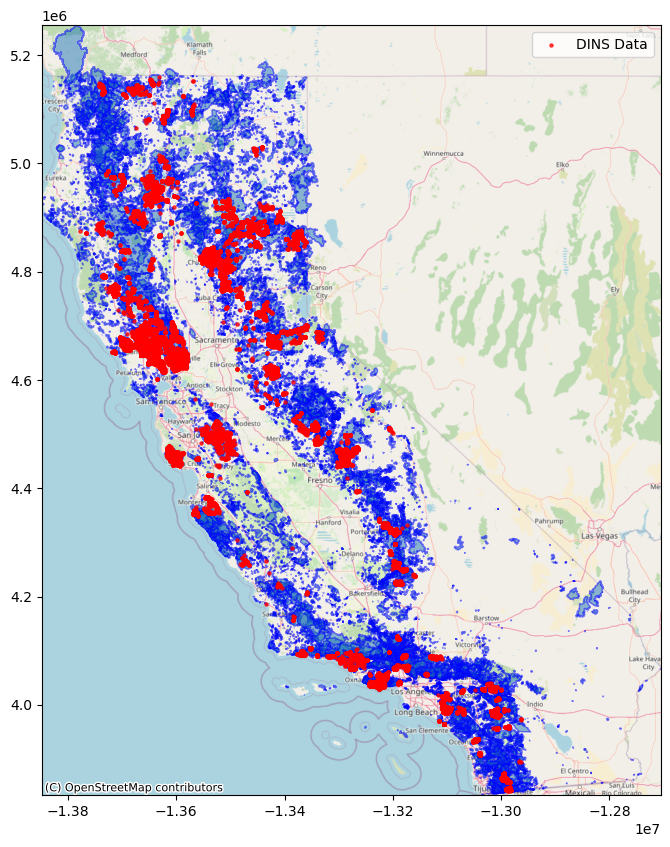

In [4]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the California Fire Perimeters (polygon data)
gdf_perim.plot(ax=ax, alpha=0.5, edgecolor='blue')

# Plot the CAL FIRE DINS Data (point data)
gdf_dins.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7, label='DINS Data')

# Ensure the extent is set before adding the basemap
ax.set_xlim(gdf_perim.total_bounds[0], gdf_perim.total_bounds[2])
ax.set_ylim(gdf_perim.total_bounds[1], gdf_perim.total_bounds[3])

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_perim.crs)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [5]:
# Filter the GeoDataFrame for the years 2000 to 2023
gdf_perim_filtered = gdf_perim[(gdf_perim['YEAR_'] >= 2000) & (gdf_perim['YEAR_'] <= 2023)]

# Display the number of entries after filtering
print(f"Number of records from 2000 to 2023: {len(gdf_perim_filtered)}")

# Filtering the CAL FIRE DINS Data for incidents on or after 01/01/2000
gdf_dins_filtered = gdf_dins[gdf_dins['INCIDENTST'] >= '2000-01-01']


Number of records from 2000 to 2023: 7817


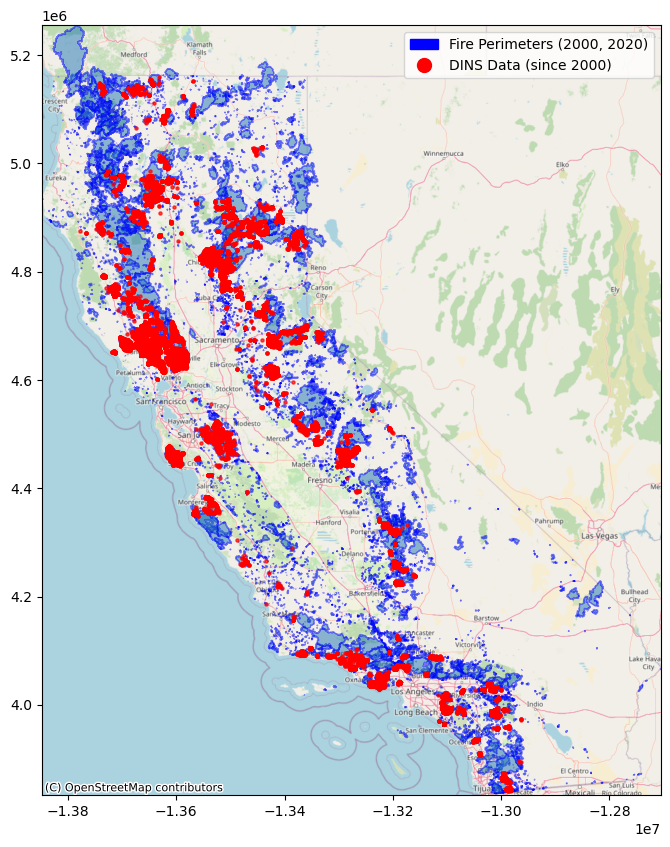

In [6]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the filtered California Fire Perimeters (polygon data)
gdf_perim_filtered.plot(ax=ax, alpha=0.5, edgecolor='blue', label='Fire Perimeters (2000, 2023)')

# Plot the filtered CAL FIRE DINS Data (point data)
gdf_dins_filtered.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7, label='DINS Data (since 2000)')

# Ensure the extent is set before adding the basemap
ax.set_xlim(gdf_perim.total_bounds[0], gdf_perim.total_bounds[2])
ax.set_ylim(gdf_perim.total_bounds[1], gdf_perim.total_bounds[3])

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_perim.crs)

# Create custom legend handles
fire_perimeters_patch = mpatches.Patch(color='blue', label='Fire Perimeters (2000, 2020)')
dins_data_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                                 markersize=10, label='DINS Data (since 2000)')

# Add the custom legend
ax.legend(handles=[fire_perimeters_patch, dins_data_marker])

# Show the plot
plt.show()

The counties geopackage file that was used here is located at:  
https://gis.data.ca.gov/datasets/8713ced9b78a4abb97dc130a691a8695/explore

In [7]:
# Export the filtered California Fire Perimeters to a GeoPackage
gdf_perim_filtered.to_file('../Shapefiles/California_Fire_Perimeters_2000_2020.gpkg', layer='fire_perimeters', driver="GPKG")

# Export the filtered CAL FIRE DINS Data to a GeoPackage
gdf_dins_filtered.to_file('../Shapefiles/CAL_FIRE_DINS_Since_2000.gpkg', layer='dins_data', driver="GPKG")


In [8]:
# Select the specific columns from the filtered data
gdf_perim_filtered_subset = gdf_perim_filtered[
    ['YEAR_', 'STATE', 'AGENCY', 'FIRE_NAME', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'COMPLEX_NA', 'IRWINID', 'FIRE_NUM', 'DECADES', 'geometry']
]
# Export the filtered subset of California Fire Perimeters to a GeoPackage
gdf_perim_filtered_subset.to_file('../Shapefiles/California_Fire_Perimeters_2000_2020_Subset.gpkg', layer='fire_perimeters_subset', driver="GPKG")


In [9]:
# Select the specific columns from the filtered DINS data
gdf_dins_filtered_subset = gdf_dins_filtered[
    ['OBJECTID', 'DAMAGE', 'CITY', 'ZIPCODE', 'COUNTY', 'INCIDENTNA', 'INCIDENTST', 
     'HAZARDTYPE', 'STRUCTURET', 'STRUCTUREC', 'FIRENAME', 'YEARBUILT', 
     'SITEADDRES', 'Latitude', 'Longitude', 'geometry']
]

# Export the filtered subset of CAL FIRE DINS Data to a GeoPackage
gdf_dins_filtered_subset.to_file('../Shapefiles/CAL_FIRE_DINS_Since_2000_Subset.gpkg', layer='dins_data_subset', driver="GPKG")


In [10]:
import geopandas as gpd

# Load the California county boundaries from the GeoPackage
gdf_counties = gpd.read_file(r'Resources/California_County_Boundaries.gpkg')


In [11]:
# Perform the spatial join between the fire perimeters and the county boundaries
gdf_perim_with_counties = gpd.sjoin(gdf_perim_filtered_subset, gdf_counties, how="left", predicate="intersects")

# The resulting GeoDataFrame will include county information and fire details such as 'FIRE_NAME'


In [12]:
gdf_perim_with_counties

,YEAR_,STATE,AGENCY,FIRE_NAME,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,COMPLEX_NA,IRWINID,...,DECADES,geometry,index_right,COUNTY_NAME,COUNTY_ABBREV,COUNTY_NUM,COUNTY_CODE,COUNTY_FIPS,ISLAND,GlobalID
0,2023,CA,CDF,WHITWORTH,2023/06/17,2023/06/17,5,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},...,2020,"POLYGON ((-13682443 5091132.739, -13682445.825...",46,Siskiyou,SIS,47,47,093,None,{79363538-FD2D-4CCD-8370-D3D130C54777}
1,2023,CA,LRA,KAISER,2023/06/02,2023/06/02,5,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},...,2020,"POLYGON ((-13576727.142 4841226.161, -13576726...",3,Butte,BUT,4,04,007,None,{44FBA680-AECC-4E04-A499-29D69AFFBD4A}
2,2023,CA,CDF,JACKSON,2023/07/01,2023/07/02,2,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},...,2020,"POLYGON ((-13459243 4621236, -13458968 4621453...",2,Amador,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6}
3,2023,CA,CDF,CARBON,2023/07/11,2023/07/11,9,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},...,2020,"POLYGON ((-13468077 4642260, -13467975 4642332...",2,Amador,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6}
4,2023,CA,CDF,LIBERTY,2023/07/11,2023/07/12,14,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},...,2020,"POLYGON ((-13468418 4614853, -13468428 4614801...",2,Amador,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,2000,CA,NPS,PT BONITA,2000/10/22,2000/11/01,8,None,None,None,...,2000,"POLYGON ((-13639835.818 4554839.017, -13639790...",20,Marin,MRN,21,21,041,None,{F2604FED-7C76-4BCB-A5E0-667D6D3405B5}
7813,2000,CA,NPS,CONIFER,2000/01/01,2000/01/20,18,None,None,None,...,2000,"POLYGON ((-13217914.006 4362432.814, -13217947...",53,Tulare,TUL,54,54,107,None,{709BE848-8AAC-4CD3-BF13-8B982EDE6775}
7814,2000,CA,NPS,HAPPY,2000/07/22,2000/08/05,5,None,None,None,...,2000,"POLYGON ((-13036219.138 4310454.498, -13036219...",13,Inyo,INY,14,14,027,None,{24BDC0FF-4379-4055-A132-96A222AFA5F5}
7815,2000,CA,CCO,CALABASAS,2000/06/11,2000/06/12,14,None,None,None,...,2000,"POLYGON ((-13211780.748 4055440.009, -13211724...",55,Ventura,VEN,56,56,111,None,{DFDE8E6B-742D-48C4-A4A0-4952E37D938B}


Fire incidence counts by county

In [13]:
# Group by county and aggregate the fire names
fires_by_county_with_names = gdf_perim_with_counties.groupby('COUNTY_NAME').agg({
    'FIRE_NAME': lambda x: ', '.join(set(x.dropna())),  # Combine fire names into a single string
    'FIRE_NUM': 'size'  # Count the number of fires
}).reset_index()

# Rename the columns for clarity
fires_by_county_with_names.rename(columns={'FIRE_NUM': 'fire_count'}, inplace=True)


# Optionally, export to a CSV file
fires_by_county_with_names.to_csv('Outputs/fires_by_county_with_names.csv', index=False)

# Display the result
fires_by_county_with_names.head()


,COUNTY_NAME,FIRE_NAME,fire_count
0,Alameda,"UPRR_FIRE2_, UPRR_FIRE4_, PASS, UPRR_FIRE_, BI...",39
1,Alpine,"DONNELL, IRENE, MCCORMICK, COTTON, CANNON, DIX...",29
2,Amador,"COPPER FIRE, LAMBERT FIRE, STONY, WINTON, BEAR...",46
3,Butte,"LONE, WALL, SADDLE, STORRIE, DENIZ, CLARK, PAL...",133
4,Calaveras,"LEONARD, EVANS, LAKE, PACHECO, LYNETTE, PG&E#1...",103


Counties that had no fire activity from 2000 to today

In [14]:
import pandas as pd

# Perform a left join to include all counties, even those with no fires
counties_with_fire_counts = pd.merge(gdf_counties[['COUNTY_NAME']], fires_by_county_with_names, on='COUNTY_NAME', how='left')

# Fill NaN values in the fire count column with 0 (indicating no fires)
counties_with_fire_counts['fire_count'] = counties_with_fire_counts['fire_count'].fillna(0)

# Filter to get counties with no fires
counties_with_no_fires = counties_with_fire_counts[counties_with_fire_counts['fire_count'] == 0]

# Display or export the result
print(counties_with_no_fires)

# Export to CSV if needed
counties_with_no_fires.to_csv(r'Outputs/counties_with_no_fires.csv', index=False)


      COUNTY_NAME FIRE_NAME  fire_count
37  San Francisco       NaN         0.0


In [15]:
# Group by county and year, and count the number of fire perimeters
fires_by_county_year = gdf_perim_with_counties.groupby(['COUNTY_NAME', 'YEAR_']).size().reset_index(name='fire_perim_count')

# Display the result
print(fires_by_county_year)

# Optionally, create a pivot table for easier visualization
fires_by_county_year_pivot = fires_by_county_year.pivot(index='COUNTY_NAME', columns='YEAR_', values='fire_perim_count').fillna(0)

# Display the pivot table
print(fires_by_county_year_pivot)

# Export the pivot table to a CSV file if needed
fires_by_county_year_pivot.to_csv('Outputs/fires_by_county_year.csv')


     COUNTY_NAME  YEAR_  fire_perim_count
0        Alameda   2000                 1
1        Alameda   2001                 1
2        Alameda   2002                 4
3        Alameda   2003                 4
4        Alameda   2005                10
...          ...    ...               ...
1123        Yuba   2019                 7
1124        Yuba   2020                10
1125        Yuba   2021                15
1126        Yuba   2022                 8
1127        Yuba   2023                 6

[1128 rows x 3 columns]
YEAR_            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
COUNTY_NAME                                                                   
Alameda           1.0   1.0   4.0   4.0   0.0  10.0   1.0   0.0   0.0   0.0   
Alpine            2.0   0.0   1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   
Amador            0.0   3.0   5.0   2.0   3.0   1.0   2.0   0.0   1.0   0.0   
Butte             3.0   4.0   3.0   5.0   1.0   0.0   3.0   3.0  17.0   2.0 

# Heat Map of fire, county by county

Aggregate the Total Count of Fires by County


In [16]:
# Aggregate the total count of fires by county
fires_by_county = gdf_perim_with_counties.groupby('COUNTY_NAME').size().reset_index(name='total_fires')

# Merge this data back with the county boundaries GeoDataFrame to ensure we have a geometry for each county
gdf_counties_fires = gdf_counties.merge(fires_by_county, on='COUNTY_NAME', how='left')

# Fill NaN values with 0 for counties with no fires
gdf_counties_fires['total_fires'] = gdf_counties_fires['total_fires'].fillna(0)


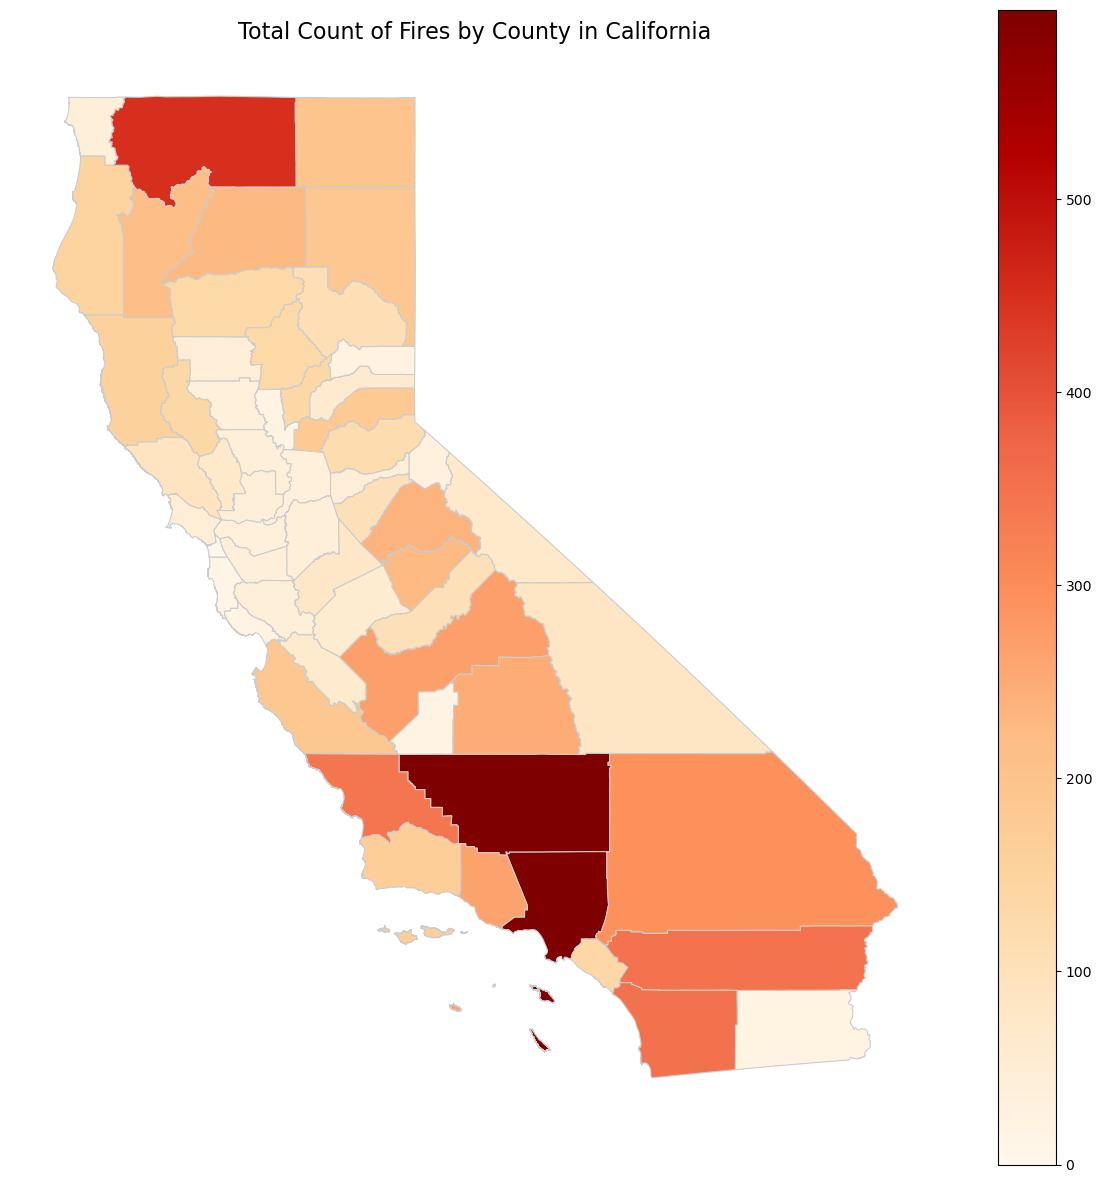

In [17]:
# Plot Map

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the heat map by plotting the counties and coloring by the 'total_fires' column
gdf_counties_fires.plot(column='total_fires', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
ax.set_title('Total Count of Fires by County in California', fontsize=16)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()


# Fire perimeters by year from 2000 to 2023  
This code creates a .gif file that is too big to be stored on the repo.

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Create a directory to store the individual frames
frames_dir = "../frames"
os.makedirs(frames_dir, exist_ok=True)

# Define a function to update the plot for each year
def update_and_save(year):
    ax.clear()
    ax.set_title(f'Fire Progression in California: {year}', fontsize=16)
    
    # Plot the counties
    gdf_counties.plot(ax=ax, color='none', edgecolor='black')
    
    # Filter for the current year's fires
    yearly_fires = gdf_perim_with_counties[gdf_perim_with_counties['YEAR_'] == year]
    
    # Only plot if there are fires for the given year
    if not yearly_fires.empty:
        yearly_fires.plot(ax=ax, color='red', alpha=0.5, edgecolor='none')
    
    # Remove axis for a cleaner look
    ax.set_axis_off()
    
    # Save the frame as an image
    frame_filename = os.path.join(frames_dir, f"frame_{year}.png")
    plt.savefig(frame_filename)
    print(f"Saved frame for year: {year}")

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each year and save the frames
for year in range(2000, 2024):
    update_and_save(year)

# Close the plot
plt.close()


Saved frame for year: 2000
Saved frame for year: 2001
Saved frame for year: 2002
Saved frame for year: 2003
Saved frame for year: 2004
Saved frame for year: 2005
Saved frame for year: 2006
Saved frame for year: 2007
Saved frame for year: 2008
Saved frame for year: 2009
Saved frame for year: 2010
Saved frame for year: 2011
Saved frame for year: 2012
Saved frame for year: 2013
Saved frame for year: 2014
Saved frame for year: 2015
Saved frame for year: 2016
Saved frame for year: 2017
Saved frame for year: 2018
Saved frame for year: 2019
Saved frame for year: 2020
Saved frame for year: 2021
Saved frame for year: 2022
Saved frame for year: 2023


In [20]:
import imageio.v2 as imageio  # Use v2 to maintain current behavior
import os

# Load all the frames and combine them into a GIF
frames_dir = "../frames"
frames = [os.path.join(frames_dir, f"frame_{year}.png") for year in range(2000, 2024)]
gif_filename = r'fire_progression_2000_2023.gif'

# Create the GIF
with imageio.get_writer(gif_filename, mode='I', fps=2) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)

print(f"GIF saved as: {gif_filename}")


GIF saved as: fire_progression_2000_2023.gif
